<a href="https://colab.research.google.com/github/abhikr1302/ML-Capstone-Health-Insurance-Cross-sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :Yes : Customer got his/her vehicle damaged in the past. No : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# **1.Importing Libraries and dataset**

In [1]:
#Importing libraries for data handeling
import pandas as pd
import numpy as np
from numpy import math
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Importing Machine Learning libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn import metrics
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


#Classification Score
from sklearn.feature_selection import mutual_info_classif

# Importing libraries for hanling imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Visualization 
from sklearn.tree import export_graphviz
from sklearn import tree
from xgboost import plot_tree

In [2]:
 #importing the drive
 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading File

df=pd.read_csv('/content/drive/MyDrive/ML Capstone Project-Health Insurance Cross Sales/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

# **2.Data Study**

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

As we can see, our data set contains 381109 rows and 12 columns.


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


We have 4 numeric and 5 categorical independent features.

In [8]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

## Conclusions

1.   As we can see, our data set contains 381109 rows and 12 columns.
2.   We do not have any Null Values in our dataset.
3.   We have 4 numeric and 5 categorical independent features.

# **3.Data Cleaning**

## **3.1 Dropping column**

In [10]:
#dropping the id column
df.drop(columns = 'id', inplace = True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


We have dropped Id column as it is a unique component in the dataset

## **3.2 Checking for outliers**

In [11]:
numerical_features=["Age","Annual_Premium","Vintage"]

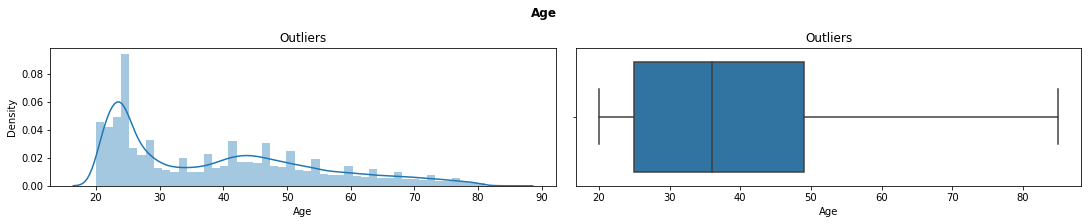

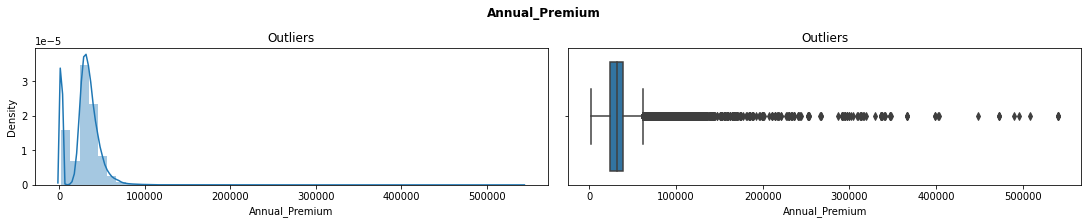

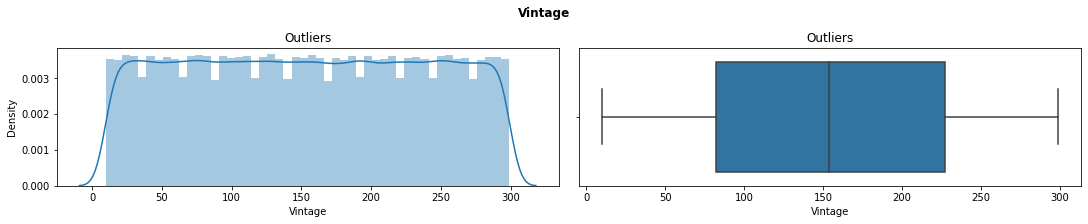

In [12]:
for col in numerical_features:  #subplotting all the values with outliers 
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers")
  plt.suptitle(f'{col.title()}',weight='bold')

Here Column 'Age', 'Annual Premium' and 'Vintage' are numerical features abut there are outliers in the 'Age' and 'Annual Premium' only.

## **3.3 Handling Outliers**

In [13]:
for col in ['Age','Annual_Premium']:#redefining the data and setting the outliers value with the range
  
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  
  df[col] = np.where(df[col] > upper_limit, median,np.where(
                         df[col] < lower_limit,median,np.where(
                         df[col] < lower_cap,lower_cap,np.where(
                         df[col] > upper_cap,upper_cap,df[col]))))

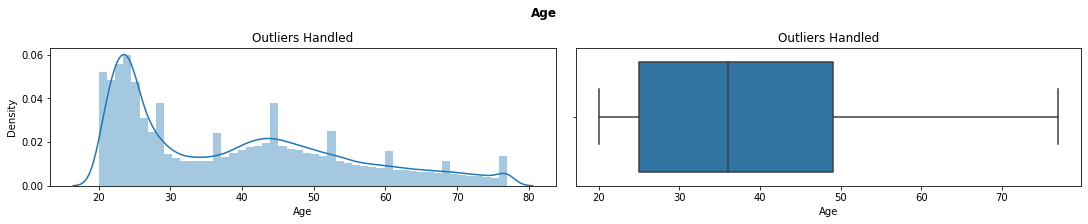

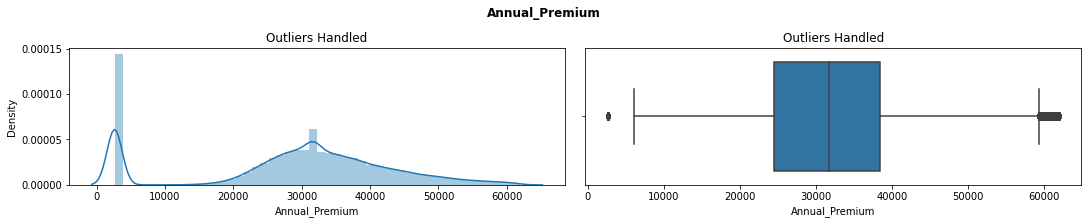

In [14]:
for col in ['Age','Annual_Premium']:
  fig, ax =plt.subplots(1,2, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Outliers Handled")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outliers Handled")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

Here we have used IQR(Inter-Quartile Range) method to treat the outliers.

##**3.4 Correlation**

Text(0.5, 1.05, 'Heat Corelation Map')

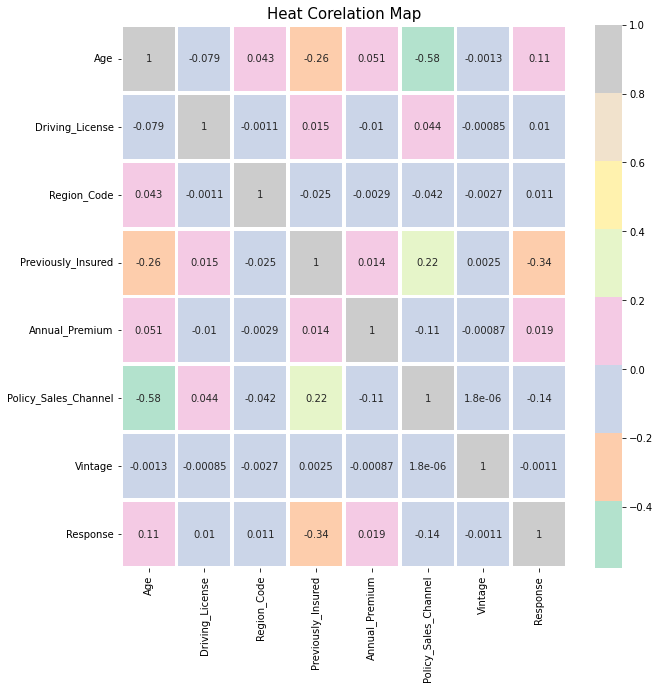

In [15]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='Pastel2')

plt.title("Heat Corelation Map", y=1.05, size=15)

We have used Heatmap to show the correlation between all the features.

We can see that all the features are very less correlated to each other.

#**4. EDA**

In [16]:
features = df.loc[ : , df.columns != 'Response']

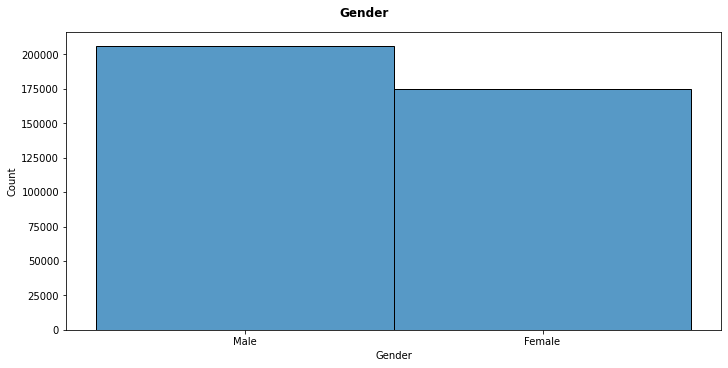

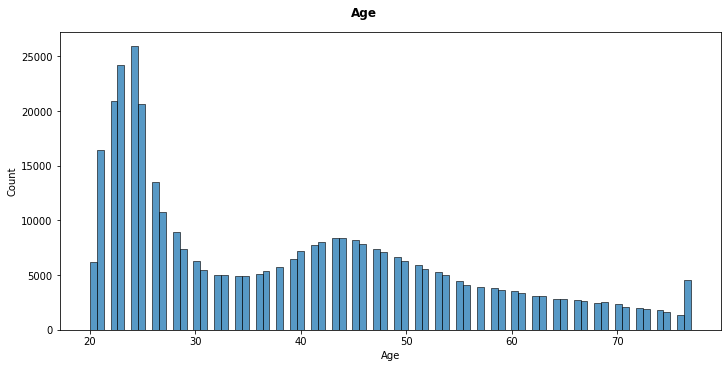

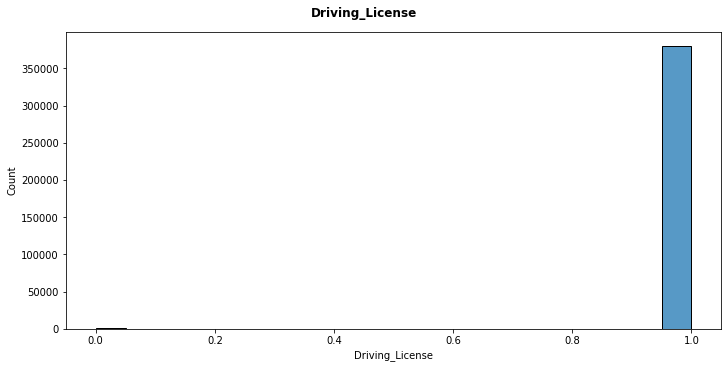

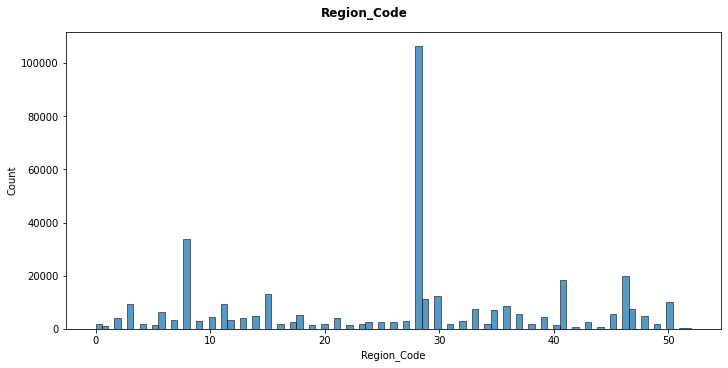

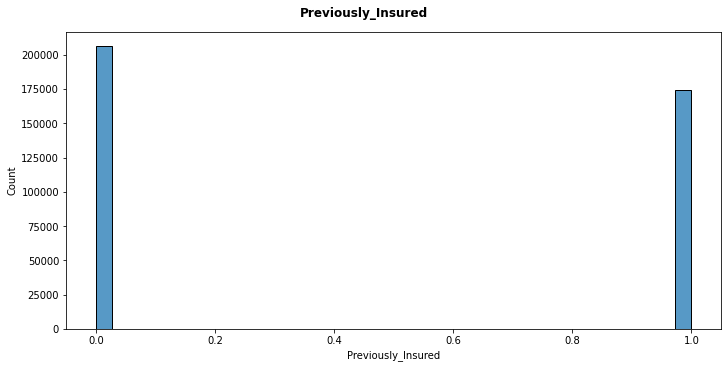

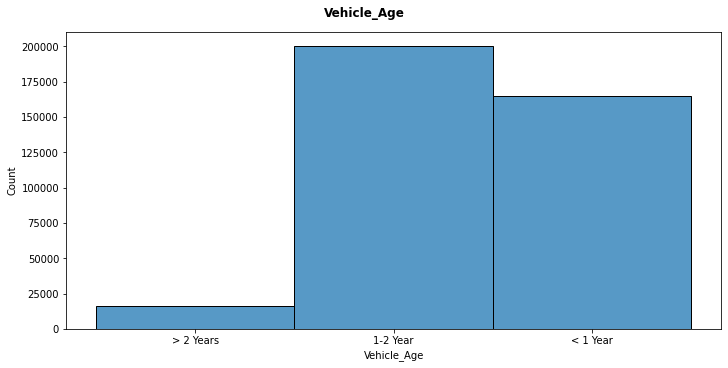

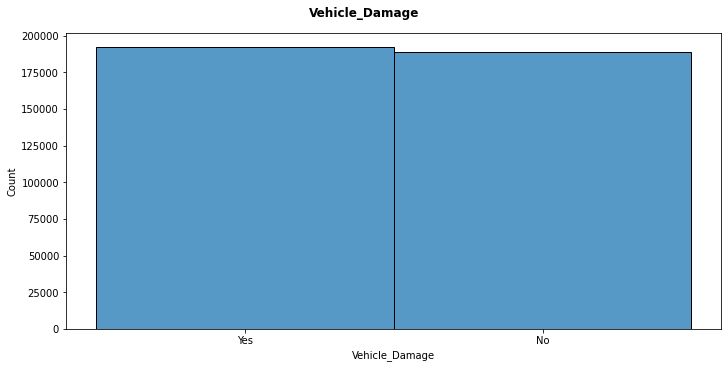

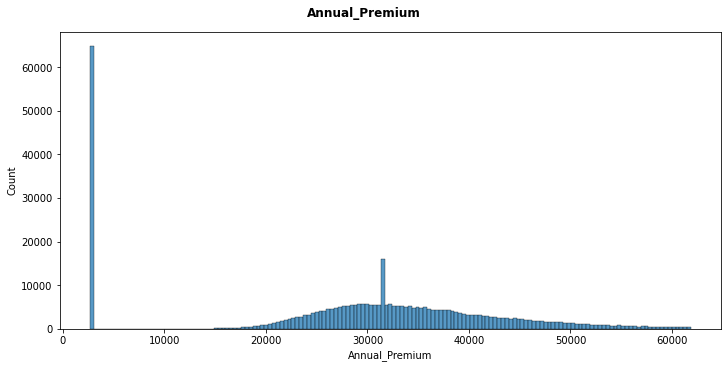

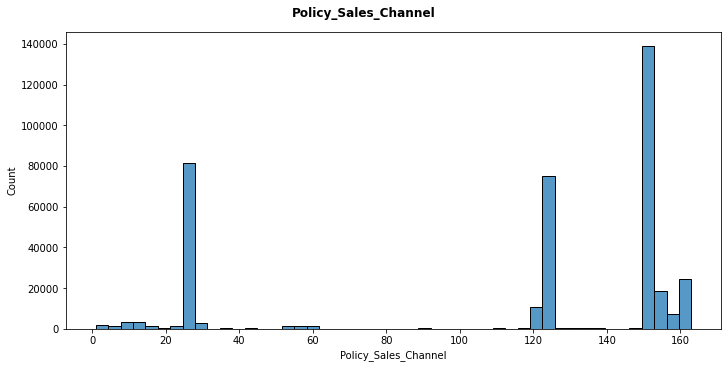

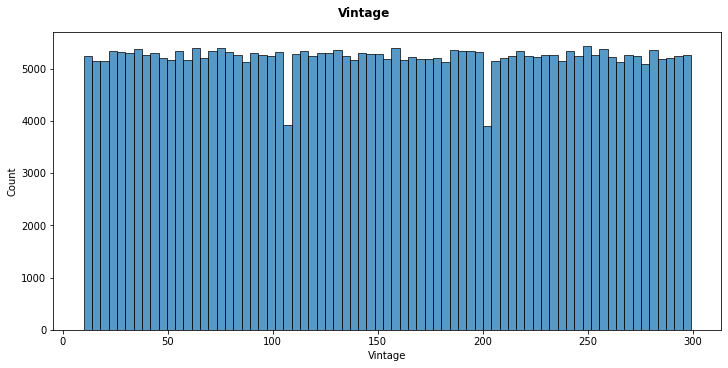

In [17]:
for col in features:
  fig, ax =plt.subplots(1,1, constrained_layout=True)
  fig.set_size_inches(10, 5)
  sns.histplot(df[col])
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

**Gender Vs Response**

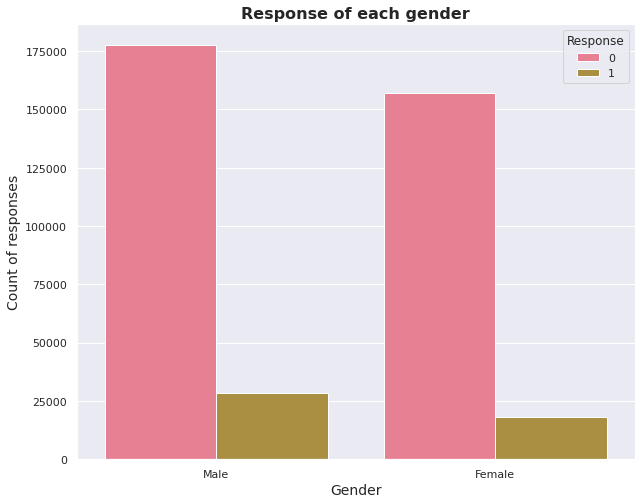

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("husl")
graph = sns.countplot(x=df['Gender'],hue=df['Response'])
graph.set_title('Response of each gender',fontsize = 16, fontweight='bold')
graph.set_xlabel('Gender',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

This graph shows that Males prefer more to take Vehicle Insurance as compared to Females.

**Age Vs Response**

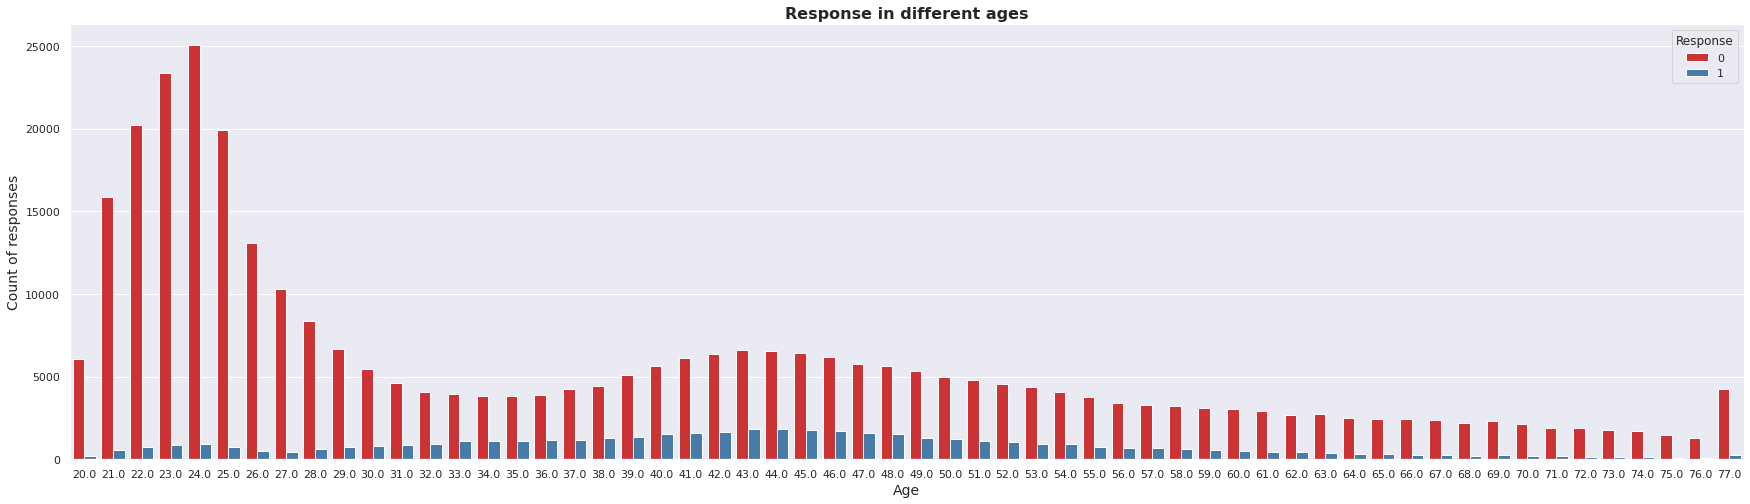

In [19]:
sns.set(rc={'figure.figsize':(30,8)})
sns.set_palette("Set1")
graph = sns.countplot(x='Age',hue = 'Response', data=df)
graph.set_title('Response in different ages',fontsize = 16, fontweight='bold')
graph.set_xlabel('Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

It shows that majority of people lies between the age group of 20-30 Years in this dataset but people from the age group 30-50 are more intrested in taking Vehicle Insurance as most of the people of this age group have taken .

In [20]:
df['Age_Group'] = df['Age'].apply(lambda x:'Young Age' if x >= 20 and x<=40 else 'Middle Age' if x>40 and x<=60 else 'Old Age')

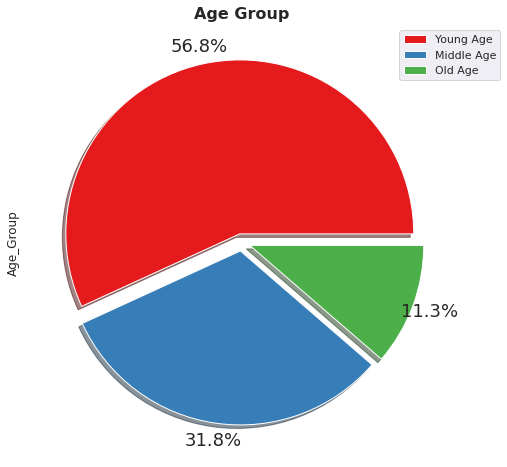

In [21]:
ax=df['Age_Group'].value_counts().plot.pie(explode=[0.05]*3, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,shadow=True,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Age_Group'].value_counts().index.tolist())
plt.title('Age Group',fontsize = 16, fontweight='bold')
plt.show()

Here we have binned different people into 3 groups into 'Young Age', 'Middle Age' and 'Old Age' based on their age criteria.

This graph shows that most of the people are from Young Age, hence comprising 56.8% of total population

**Driving license**

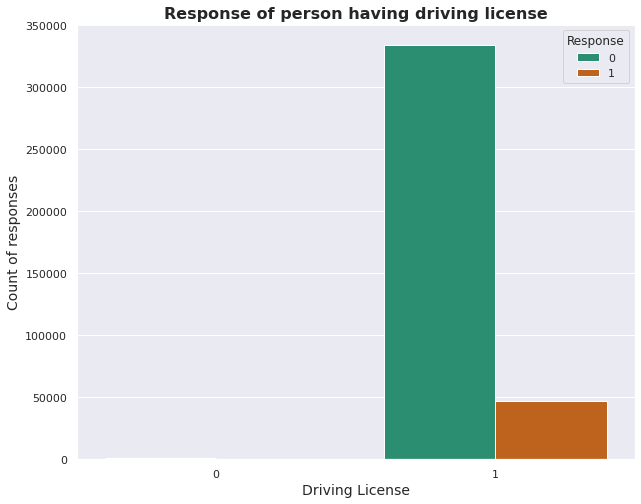

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Dark2")
graph = sns.countplot(x=df['Driving_License'],hue=df['Response'])
graph.set_title('Response of person having driving license',fontsize = 16, fontweight='bold')
graph.set_xlabel('Driving License',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

This graph shows that people having Drivng License are more expected to take Vehicle Insurance.

**Region Vs Response**

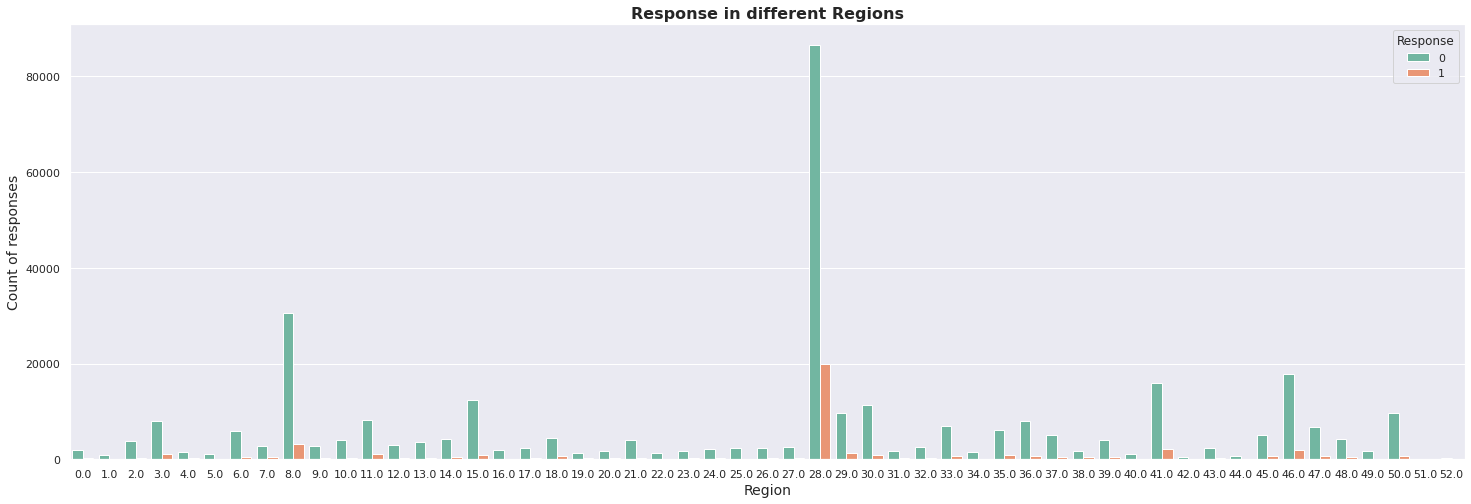

In [23]:
sns.set(rc={'figure.figsize':(25,8)})
sns.set_palette("Set2")
graph = sns.countplot(x=df['Region_Code'],hue=df['Response'])
graph.set_title('Response in different Regions',fontsize = 16, fontweight='bold')
graph.set_xlabel('Region',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

It shows that Region code-38 have the highest number of possiblity for Vehicle Insurance.

**Previously Insured**

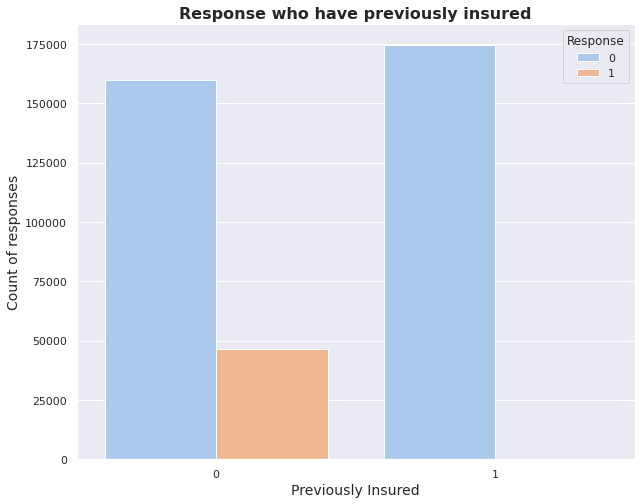

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("pastel")
graph = sns.countplot(x=df['Previously_Insured'],hue=df['Response'])
graph.set_title('Response who have previously insured',fontsize = 16, fontweight='bold')
graph.set_xlabel('Previously Insured',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

It clearly says that people who are not previously insured are more likely to take Vehicle Insurance.

**Vehicle Age Vs Response**

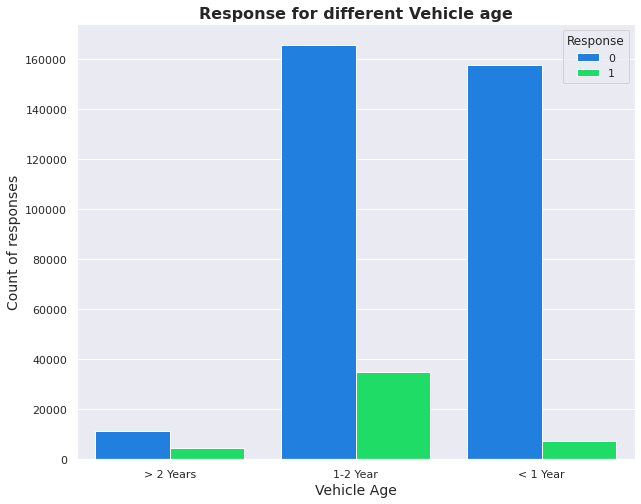

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("gist_ncar")
graph = sns.countplot(x=df['Vehicle_Age'],hue=df['Response'])
graph.set_title('Response for different Vehicle age',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Age',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

This graph says that people having vehicle for 1-2 years are more interested in taking Vehicle insurance.

**Vehicle Damage**

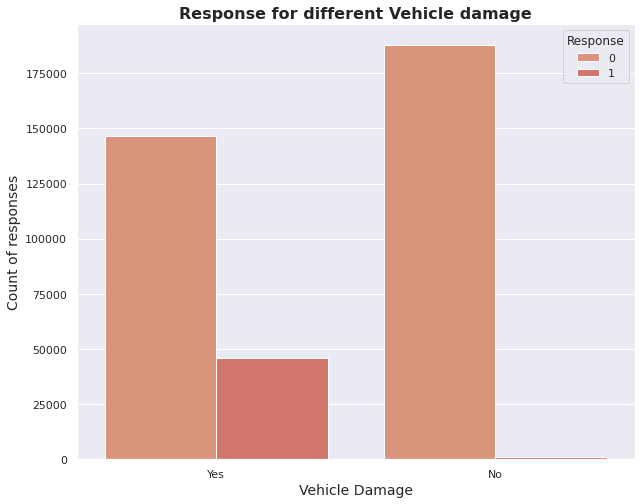

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("flare")
graph = sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'])
graph.set_title('Response for different Vehicle damage',fontsize = 16, fontweight='bold')
graph.set_xlabel('Vehicle Damage',fontsize = 14)
graph.set_ylabel('Count of responses',fontsize = 14)
plt.show()

Person facing Vehicle damage is more keened towards taking a vehicle insurance as depicted in the above graph.

**Annual Premium**

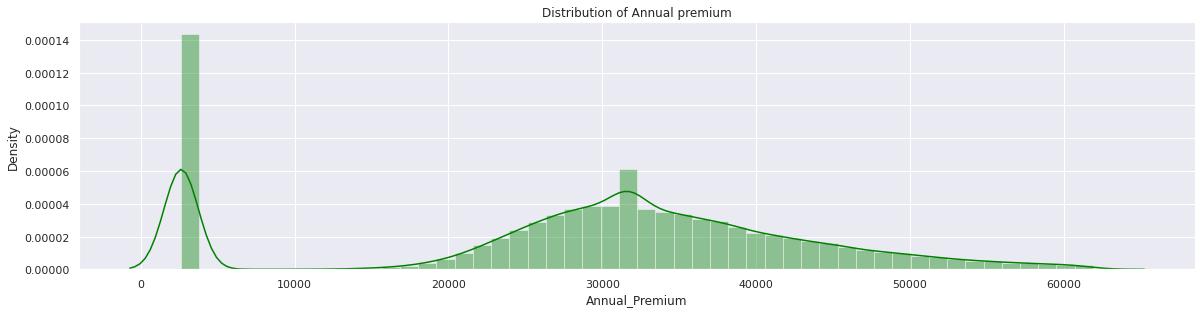

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

In [28]:
df['Annual_Premium_Group'] = df['Annual_Premium'].apply(lambda x:'Very Low Premium' if x <= 10000 else 'Low Premium' if x>10000 and x<=20000 else 'Medium Premium' if x>20000 and x<=30000 else 'High Premium' if x>30000 and x<=40000 else 'Very High Premium')

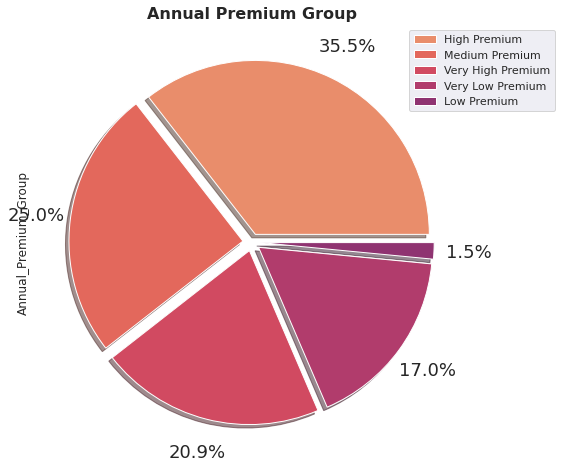

In [29]:
df['Annual_Premium_Group'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Annual_Premium_Group'].value_counts().index.tolist())
plt.title('Annual Premium Group',fontsize = 16, fontweight='bold')
plt.show()

This graph depicts that majority of annual premium lies between the range of 20K to 50K.

We have grouped different annual premium into 5 groups namely- 'Very Low Premium', 'Low Premium', Medium Premium', 'High Premium', 'Very High Premium'.

We can see that most of the annual premium lies into High premium(between 30K and 40K).

**Policy Sales Channel**

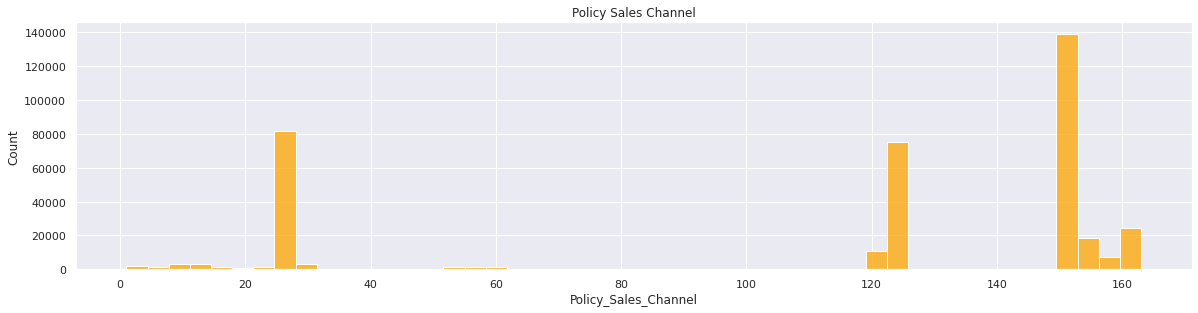

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(df['Policy_Sales_Channel'], color='orange')
plt.title("Policy Sales Channel")
plt.show()

In [31]:
df['Policy_Sales_Channel_Group'] = df['Policy_Sales_Channel'].apply(lambda x:'Channel A' if x <=40 else 'Channel B' if x>40 and x<=80 else 'Channel C' if x>80 and x<=120 else 'Channel D')

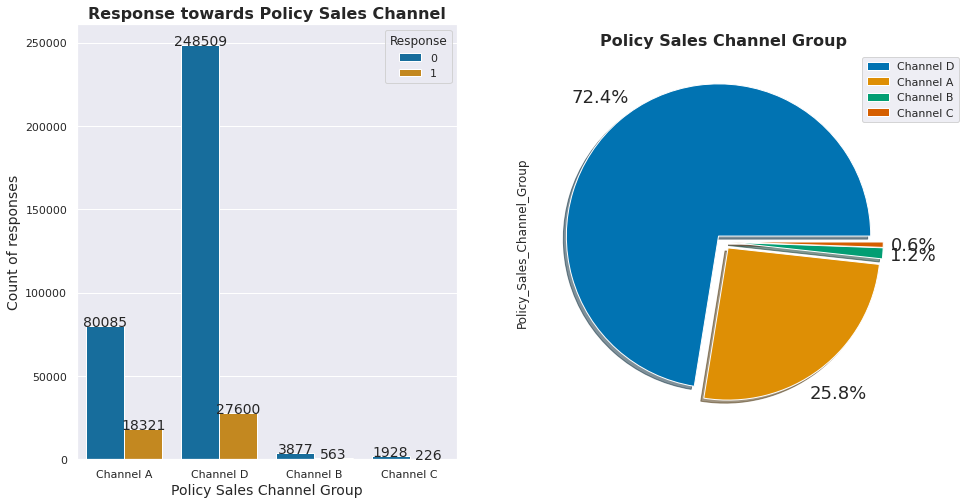

In [32]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("colorblind")
ax = sns.countplot(ax=axes[0],x='Policy_Sales_Channel_Group', hue ='Response', data=df)
ax.set_title('Response towards Policy Sales Channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Policy Sales Channel Group',fontsize = 14)
ax.set_ylabel('Count of responses',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 14)

ax =axes[1],df['Policy_Sales_Channel_Group'].value_counts().plot.pie(explode=[0.05]*4, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Policy_Sales_Channel_Group'].value_counts().index.tolist())
plt.title('Policy Sales Channel Group',fontsize = 16, fontweight='bold')
plt.show()

It shows that Policy sales channel 150-160 has outreached the customer more as compared to others.

We have grouped Policy sales channel into 4 different groups i.e 'Channel A', 'Channel B', 'Channel C', 'Channel D'.

This states that maximum of Policy sales has been booked by Channel D.

**Vintage Vs Response**

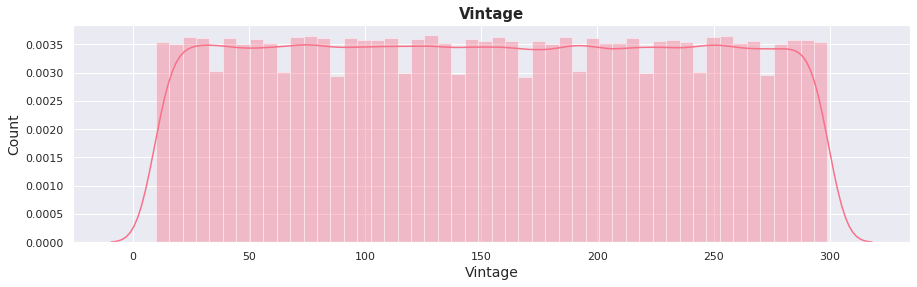

In [33]:
sns.set(rc={'figure.figsize':(15,4)})
sns.set_palette("husl")
sns.distplot(x = df['Vintage'])
plt.xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

In [34]:
df['Vintage_Group'] = df['Vintage'].apply(lambda x:'New Customer' if x <= 100 else 'Intermediate Customer' if x>100 and x<=200 else 'Old Customer')

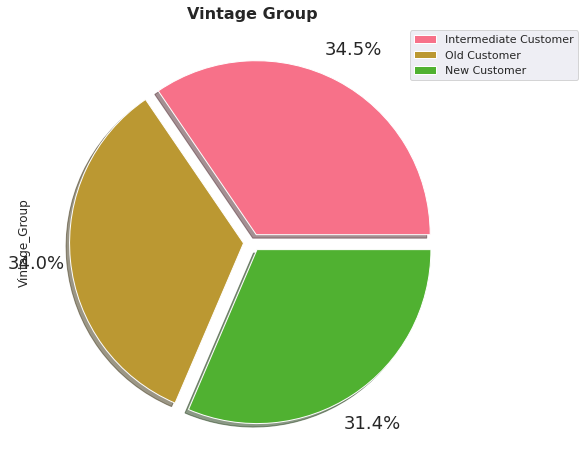

In [35]:
df['Vintage_Group'].value_counts().plot.pie(explode=[0.05]*3, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.2,shadow=True,labeldistance=1.6,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['Vintage_Group'].value_counts().index.tolist())
plt.title('Vintage Group',fontsize = 16, fontweight='bold')
plt.show()

The distribution of Vintage Column is evenly spread which ranges from 10 days to 300 days.

We have grouped Vintage column into 3 types of customers- 'New Customer', 'Intermediate Customer', 'Old Customer').

This shows that all three types of customers are nearly equal in number.

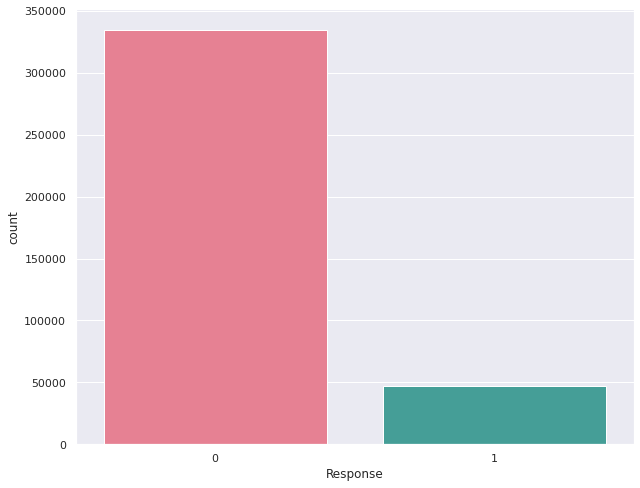

In [36]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(df['Response'],palette='husl')

We can see that our dataset is highly imbalanced

# **5. Data Processing**

###**Label Encoding**

In [37]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Age_Group'] = df['Age_Group'].apply(lambda x: 1 if x == 'Young Age' else 2 if x == 'Middle Age' else 3)
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 0 if x == 'No' else 1)
df['Policy_Sales_Channel_Group'] = df['Policy_Sales_Channel_Group'].apply(lambda x:1 if x=='Channel A' else 2 if x=='Channel B' else 3 if x=='Channel C' else 4)
df['Vintage_Group'] = df['Vintage_Group'].apply(lambda x: 1 if x == 'New Customer' else 2 if x == 'Intermediate Customer' else 3)
df['Annual_Premium_Group'] = df['Annual_Premium_Group'].apply(lambda x: 1 if x == 'Very Low Premium' else 2 if x == 'Low Premium' else 3 if x== 'Medium Premium' else 4 if x== 'High Premium' else 5)

We are removing 'Age', 'Annual Premium', 'Policy Sales Channel' and 'Vintage' as they have been grouped into separate columns.

### **Separating Dependent and Independent Data**

In [38]:
x=df.drop(['Response','Age','Vintage','Annual_Premium','Policy_Sales_Channel'],axis=1) #contain all  independent variable
y=df['Response'] #dependent variable

In [39]:
x

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Age_Group,Annual_Premium_Group,Policy_Sales_Channel_Group,Vintage_Group
0,1,1,28.0,0,3,1,2,5,1,3
1,1,1,3.0,0,2,0,3,4,1,2
2,1,1,28.0,0,3,1,2,4,1,1
3,1,1,11.0,1,1,0,1,3,4,3
4,0,1,41.0,1,1,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...
381104,1,1,26.0,1,2,0,3,4,1,1
381105,1,1,37.0,1,1,0,1,5,4,2
381106,1,1,30.0,1,1,0,1,4,4,2
381107,0,1,14.0,0,3,1,3,5,4,1


### **Feature Selection**

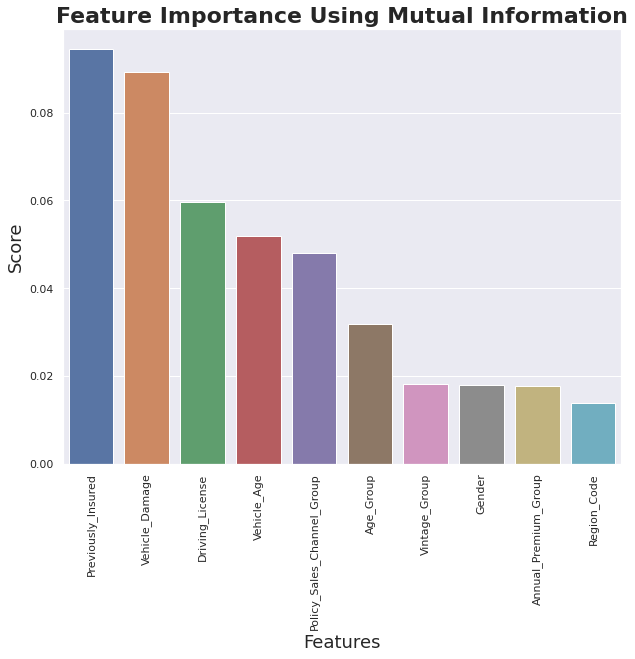

In [40]:
def mutual_info(df):
    X = x
    Y = y
    
    X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2)

    high_score_features = []
    feature_scores = mutual_info_classif( X_train, Y_train,  random_state=0)

    column_score = {}
    columns = []
    scores = []
    for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True):
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    column_score['Feature'] = columns
    column_score['Score'] = scores

    return pd.DataFrame(data = column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(df)

From the above bar plot, we can conclude Previously_Insured is the most important feature and has the highest impact on dependent feature and Region Code is the least dominant feature.

### **Handling Imbalanced Data**

In [41]:
smote = SMOTE()

# fit predictor and target variable
x_new, y_new = smote.fit_resample(x,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_new))

Original dataset shape 381109
Resampled dataset shape 668798


Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


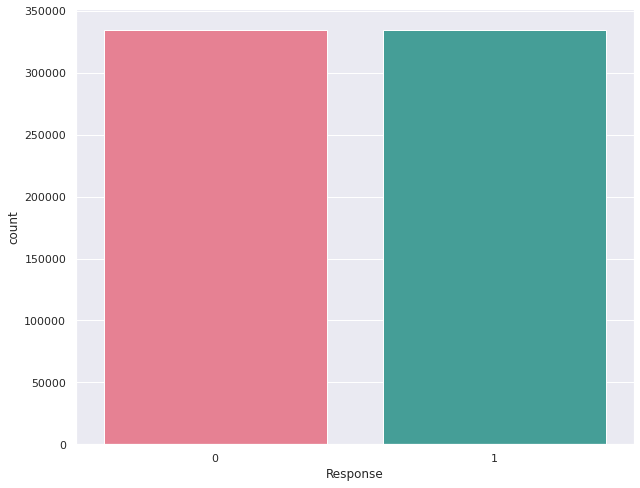

In [42]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')
sns.set(rc={'figure.figsize':(4,4)})

We have balanced our target variable using SMOTE method. Now We can perform our model building after train-test split.

### **Train-Test Split**

In [43]:
#dividing the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(535038, 10) (133760, 10) (535038,) (133760,)


We have splitted the dataset into training and testing data in the ratio of 80:20.

In [44]:
x_train[0:10]

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Age_Group,Annual_Premium_Group,Policy_Sales_Channel_Group,Vintage_Group
309428,1,1,30.0,1,1,0,1,3,4,2
444462,0,1,33.0,0,2,1,2,4,4,3
162750,0,1,28.0,1,1,0,1,3,4,3
666951,0,1,45.0,0,1,1,1,5,4,2
264235,1,1,41.0,1,2,0,2,3,1,3
606902,1,1,21.0,0,1,1,1,1,1,2
437362,0,1,50.0,0,2,1,1,4,1,3
381172,0,1,3.0,0,2,1,1,1,4,2
461143,0,1,23.0,0,1,1,1,3,4,3
361038,1,1,46.0,1,1,0,1,3,4,1


### **One Hot Encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [45]:
cols_to_encode = ['Gender','Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Group','Annual_Premium_Group', 'Vintage_Group']

data_df = pd.get_dummies(data = df, columns=cols_to_encode)
data_df.head()

,Age,Driving_License,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_0,Gender_1,Region_Code_0.0,Region_Code_1.0,...,Policy_Sales_Channel_Group_3,Policy_Sales_Channel_Group_4,Annual_Premium_Group_1,Annual_Premium_Group_2,Annual_Premium_Group_3,Annual_Premium_Group_4,Annual_Premium_Group_5,Vintage_Group_1,Vintage_Group_2,Vintage_Group_3
0,44.0,1,40454.0,26.0,217,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,76.0,1,33536.0,26.0,183,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,47.0,1,38294.0,26.0,27,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,21.0,1,28619.0,152.0,203,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,29.0,1,27496.0,152.0,39,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


#**6. Model Building**

We are applying different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them.



*   Decision Tree 
*   Random Forest
*   XgBoost
*   Naive Bayes
*   KNN
*   SVM



##**6.1. Decision Tree**

In [46]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_leaf_nodes=2,
                       min_samples_leaf=5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2, min_samples_leaf=5)

In [47]:
y_pred = dt.predict(x_test)

In [48]:
acc_DT = accuracy_score(y_test,y_pred)
prec_DT = precision_score(y_test, y_pred)
rec_DT = recall_score(y_test, y_pred)
f1_DT = f1_score(y_test, y_pred)
AUC_DT=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71     66950
           1       0.69      0.98      0.81     66810

    accuracy                           0.77    133760
   macro avg       0.83      0.77      0.76    133760
weighted avg       0.83      0.77      0.76    133760



In [49]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_DT)

Accuracy :  0.7688920454545455
ROC_AUC Score: 0.8262996957992353


**Hyperparameter Tuning**

In [50]:
# Create the parameter grid based on the results of random search 
params = {"splitter":["best","random"],
            "max_depth" : [1,3,4,5,7,9,10,12,15],
           "min_samples_leaf":[1,2,3,4,5,6,8,10],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,100],
           'criterion': ["gini", "entropy"]}

In [51]:
# Instantiate the grid search cv model
halving_search_cv = HalvingRandomSearchCV(dt, param_distributions = params, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

In [52]:
%%time
halving_search_cv.fit(x_train, y_train)

CPU times: user 26.4 s, sys: 4.85 s, total: 31.3 s
Wall time: 2min


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_samples_leaf=5),
                      n_jobs=-1,
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_depth': [1, 3, 4, 5, 7, 9, 10,
                                                         12, 15],
                                           'max_leaf_nodes': [10, 20, 30, 40,
                                                              50, 60, 70, 80,
                                                              100],
                                           'min_samples_leaf': [1, 2, 3, 4, 5,
                                                                6, 8, 10],
                                           'splitter': ['best', 'random']},
                      scoring='accuracy')

In [53]:
halving_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=80, splitter='random')

In [54]:
dt_best = halving_search_cv.best_estimator_

In [55]:
dt_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=80, splitter='random')

In [56]:
y_pred_dt = dt_best.predict(x_test)

In [57]:
acc_DT = accuracy_score(y_test,y_pred_dt)
prec_DT = precision_score(y_test, y_pred_dt)
rec_DT = recall_score(y_test, y_pred_dt)
f1_DT = f1_score(y_test, y_pred_dt)
AUC_DT=roc_auc_score(y_pred_dt,y_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66950
           1       0.70      0.98      0.82     66810

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.77    133760



In [58]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_dt))
print("ROC_AUC Score:",AUC_DT)

Accuracy :  0.7834778708133971
ROC_AUC Score: 0.8342149964746929


###**Confusion Matrix**

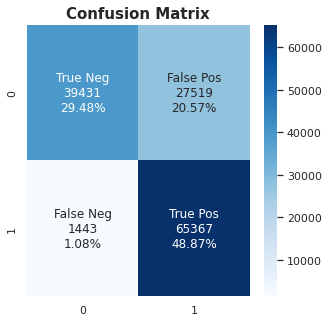

In [59]:
cm = confusion_matrix(y_test, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

### **ROC-AUC Curve** 

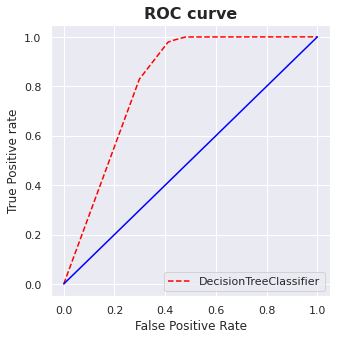

In [60]:
# predict probabilities
pred_proba = dt_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(dt_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

###**Visualization**

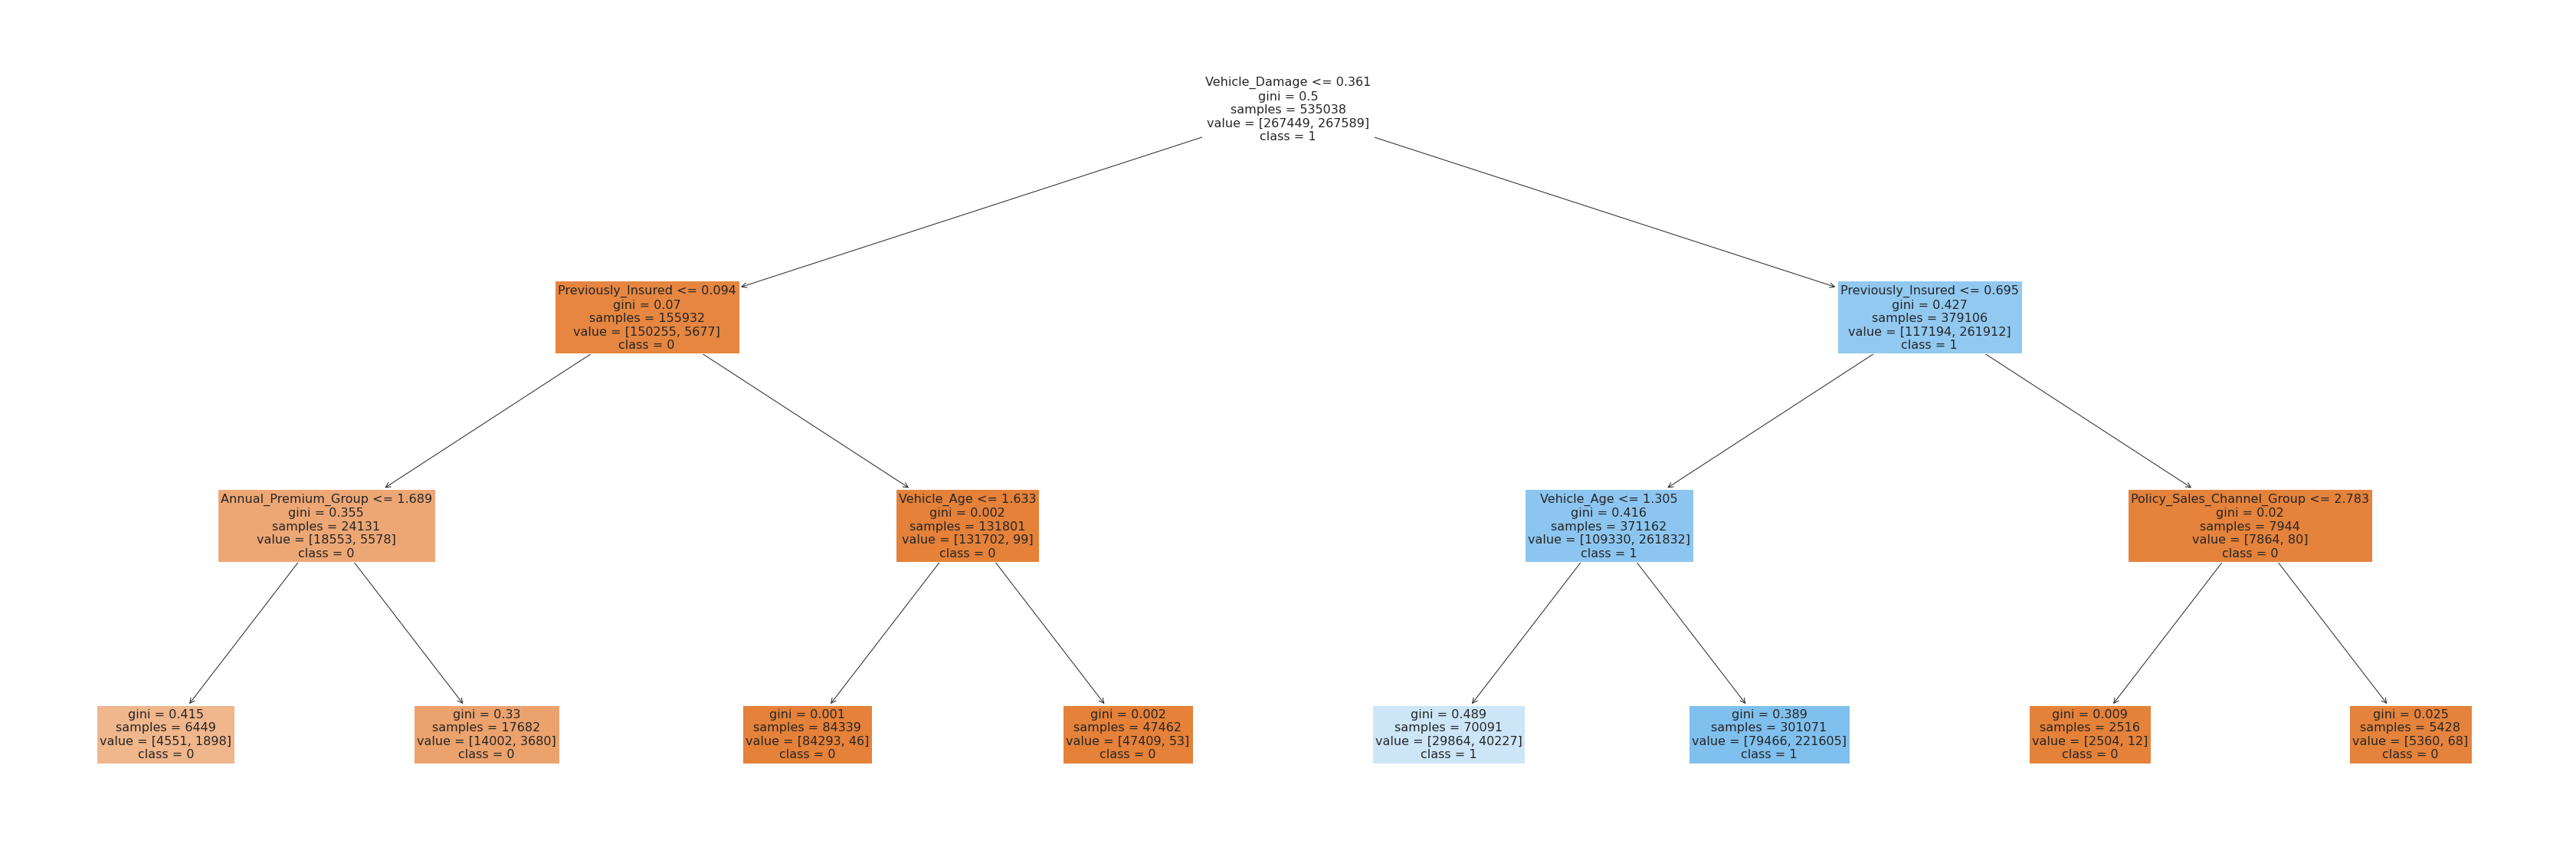

In [61]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(60,20))
a = plot_tree(dt_best, feature_names=x_train.columns, fontsize=16, filled=True, 
              class_names=['0','1'])

##**6.2. Random Forest**

In [62]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                       random_state=0)

In [63]:
y_pred = rf.predict(x_test)

In [64]:
AUC_RF=roc_auc_score(y_pred,y_test)
acc_RF=accuracy_score(y_test,y_pred)
recall_RF=recall_score(y_test,y_pred)
precision_RF=precision_score(y_test,y_pred)
f1score_RF=f1_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.75     66950
           1       0.72      0.95      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.82      0.79      0.79    133760
weighted avg       0.82      0.79      0.79    133760



In [65]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  0.7928902511961723
ROC_AUC Score: 0.8244971813726345


###**Hyperparameter Tuning**

In [66]:
params = {'n_estimators' : [20,50,100], 
          'max_depth' : [10,20,50], 
          'min_samples_split' : [2,10,15,20], 
          'min_samples_leaf' : [1,3,5,7,10],
          'criterion': ["gini", "entropy"]
          }

In [67]:
rf_random = HalvingRandomSearchCV(rf, param_distributions = params, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

In [68]:
%%time
rf_random.fit(x_train, y_train)

CPU times: user 1min 2s, sys: 4.13 s, total: 1min 6s
Wall time: 4min 28s


HalvingRandomSearchCV(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=10,
                                                       min_samples_split=5,
                                                       random_state=0),
                      n_jobs=-1,
                      param_distributions={'criterion': ['gini', 'entropy'],
                                           'max_depth': [10, 20, 50],
                                           'min_samples_leaf': [1, 3, 5, 7, 10],
                                           'min_samples_split': [2, 10, 15, 20],
                                           'n_estimators': [20, 50, 100]},
                      scoring='accuracy')

In [69]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

In [70]:
rf_best = rf_random.best_estimator_

In [71]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

In [72]:
y_pred_rf = rf_best.predict(x_test)

In [73]:
acc_RF = accuracy_score(y_test,y_pred_rf)
prec_RF = precision_score(y_test, y_pred_rf)
rec_RF = recall_score(y_test, y_pred_rf)
f1_RF = f1_score(y_test, y_pred_rf)
AUC_RF=roc_auc_score(y_pred_rf,y_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     66950
           1       0.72      0.95      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.79    133760
weighted avg       0.83      0.79      0.79    133760



In [74]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_rf))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  0.7932790071770335
ROC_AUC Score: 0.8251025734171543


###**Confusion Matrix**

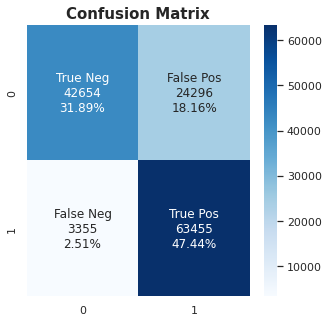

In [75]:
cm = confusion_matrix(y_test, y_pred_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

###**ROC-AUC Curve**

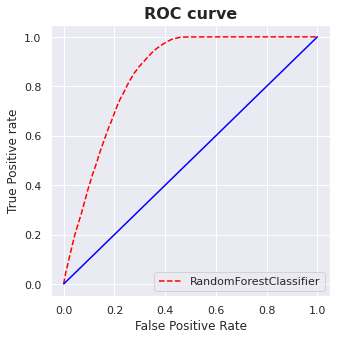

In [76]:
# predict probabilities
pred_proba = rf_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(rf_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

###**Visualization**

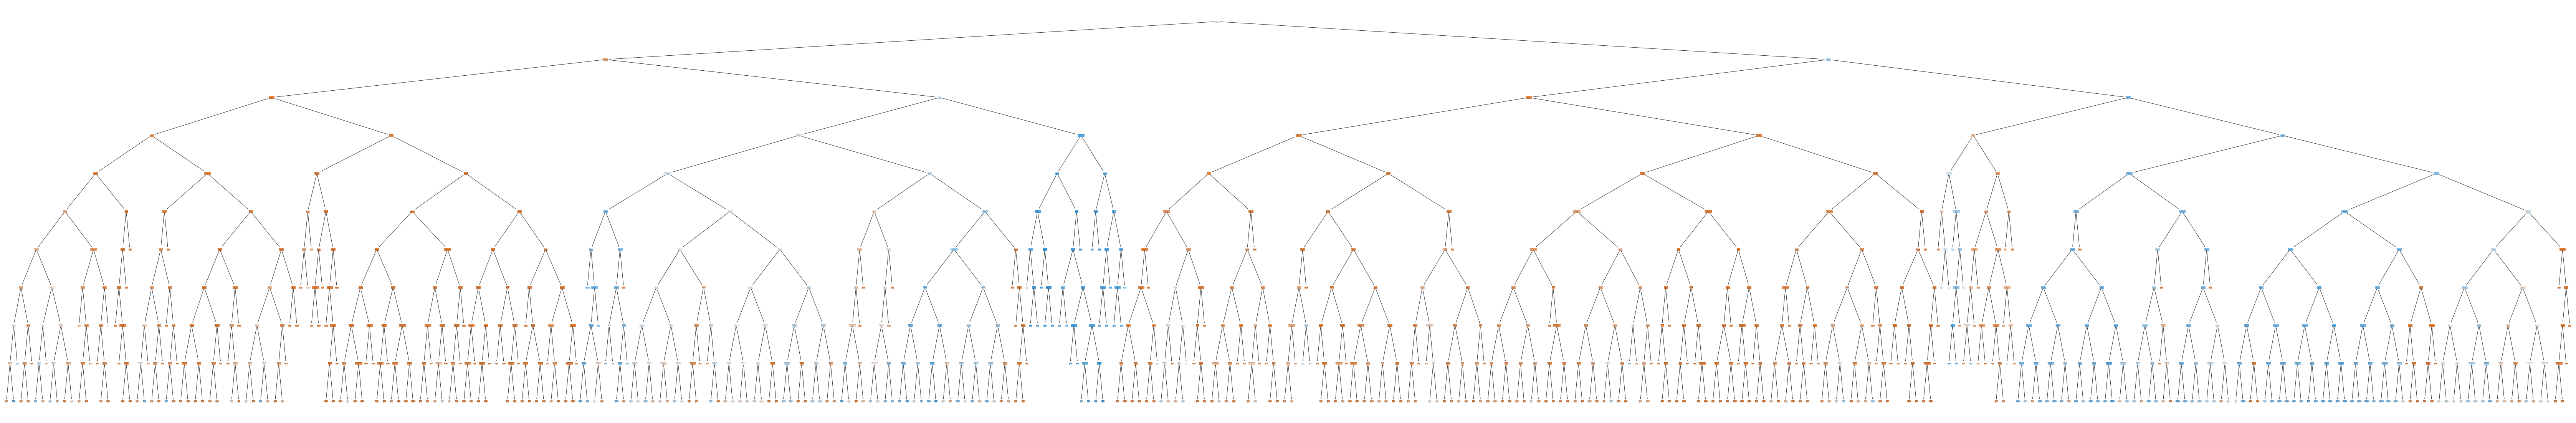

In [77]:
fig = plt.figure(figsize=(120,20))
a = plot_tree(rf.estimators_[0],
               feature_names = x_train.columns,
               filled = True,
              class_names=['0','1'])

##**6.3. XgBoost Classifier**

In [78]:
xgb=XGBClassifier()
XGB_fit=xgb.fit(x_train, y_train)

In [79]:
y_pred = XGB_fit.predict(x_test)

In [80]:
acc_XGB = accuracy_score(y_test,y_pred)
prec_XGB = precision_score(y_test, y_pred)
rec_XGB = recall_score(y_test, y_pred)
f1_XGB = f1_score(y_test, y_pred)
AUC_XGB=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     66950
           1       0.72      0.96      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760



In [81]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_XGB)

Accuracy :  0.7885017942583732
ROC_AUC Score: 0.825750484721506


###**Hyperparameter Tuning**

In [82]:
params = {'gamma': [0.1,0.2,0.5,0.8],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'max_depth': [5,6,7,8,9,10],
              'n_estimators': [50,80,100],
              'reg_alpha': [0.1,0.2,0.4,0.8],
              }

In [83]:
xg_grid = HalvingRandomSearchCV(estimator=XGB_fit, param_distributions=params, scoring='accuracy', return_train_score=True, verbose=1, cv=5)

In [84]:
%%time
xg_grid.fit(x_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 10
min_resources_: 20
max_resources_: 535038
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1440
n_resources: 20
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
----------
iter: 1
n_candidates: 480
n_resources: 60
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
----------
iter: 2
n_candidates: 160
n_resources: 180
Fitting 5 folds for each of 160 candidates, totalling 800 fits
----------
iter: 3
n_candidates: 54
n_resources: 540
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 4
n_candidates: 18
n_resources: 1620
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 5
n_candidates: 6
n_resources: 4860
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 3min 41s, sys: 4.42 s, to

HalvingRandomSearchCV(estimator=XGBClassifier(),
                      param_distributions={'gamma': [0.1, 0.2, 0.5, 0.8],
                                           'learning_rate': [0.01, 0.05, 0.1,
                                                             0.2, 0.5],
                                           'max_depth': [5, 6, 7, 8, 9, 10],
                                           'n_estimators': [50, 80, 100],
                                           'reg_alpha': [0.1, 0.2, 0.4, 0.8]},
                      scoring='accuracy', verbose=1)

In [85]:
xg_grid.best_estimator_

XGBClassifier(gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=80,
              reg_alpha=0.4)

In [86]:
xg_best = xg_grid.best_estimator_

In [87]:
xg_best.fit(x_train, y_train)

XGBClassifier(gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=80,
              reg_alpha=0.4)

In [88]:
y_pred_xg = xg_best.predict(x_test)

In [89]:
acc_XGB = accuracy_score(y_test,y_pred_xg)
prec_XGB = precision_score(y_test, y_pred_xg)
rec_XGB = recall_score(y_test, y_pred_xg)
f1_XGB = f1_score(y_test, y_pred_xg)
AUC_XGB=roc_auc_score(y_pred_xg,y_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75     66950
           1       0.72      0.94      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.82      0.79      0.78    133760
weighted avg       0.82      0.79      0.78    133760



In [90]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_xg))
print("ROC_AUC Score:",AUC_XGB)

Accuracy :  0.7889727870813397
ROC_AUC Score: 0.8176340433478109


###**Confusion Matrix**

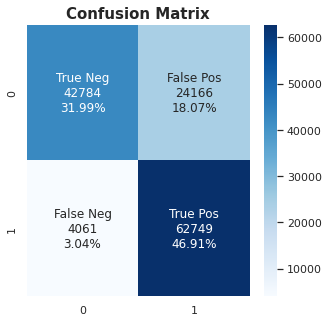

In [91]:
cm = confusion_matrix(y_test, y_pred_xg)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

###**ROC-AUC Curve**

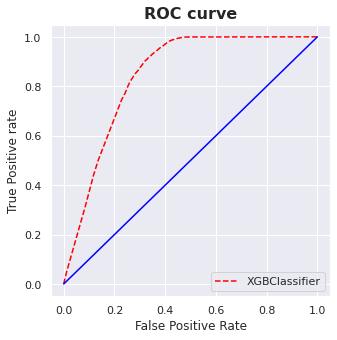

In [92]:
# predict probabilities
pred_proba = xg_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(xg_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

###**Visualization**

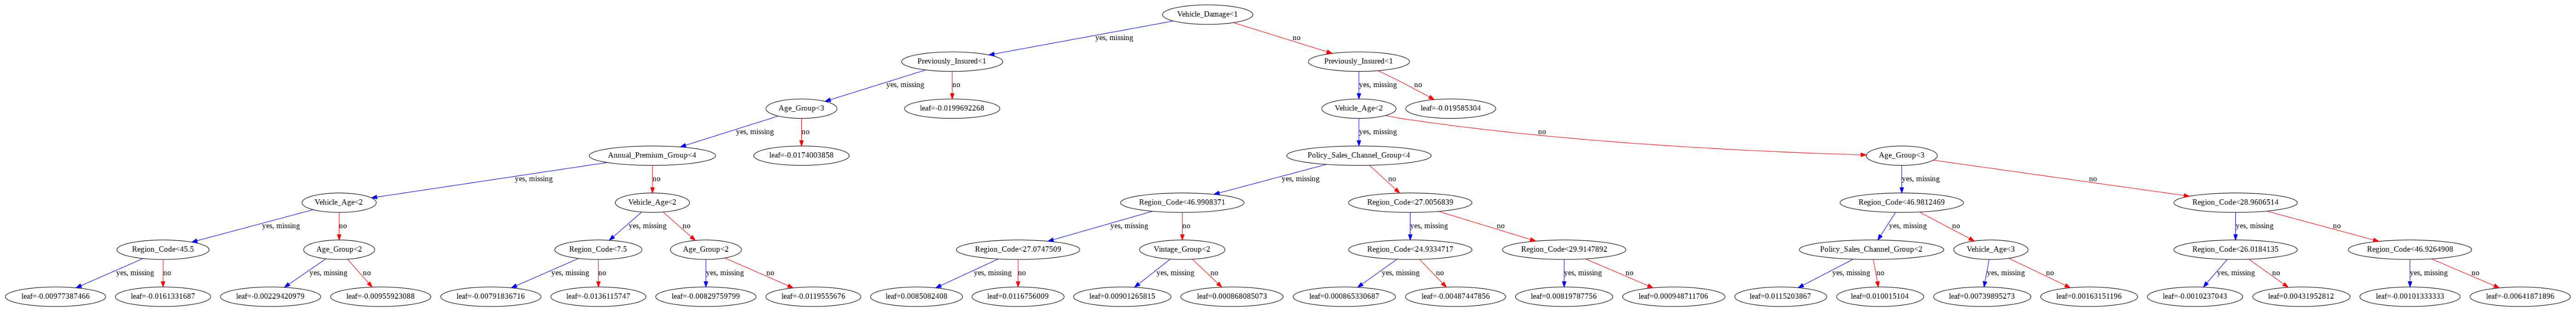

In [93]:
from xgboost import plot_tree
plot_tree(xg_best)
fig = plt.gcf()
fig.set_size_inches(100,100)

##**6.4. Naive Bayes**

In [94]:
classifier = GaussianNB()  
classifier.fit(x_train, y_train) 

GaussianNB()

In [95]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  

In [96]:
acc_NB = accuracy_score(y_test,y_pred)
prec_NB = precision_score(y_test, y_pred)
rec_NB = recall_score(y_test, y_pred)
f1_NB = f1_score(y_test, y_pred)
AUC_NB=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66950
           1       0.70      0.98      0.82     66810

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760



In [97]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_NB)

Accuracy :  0.7837918660287081
ROC_AUC Score: 0.8338902858461787


###**Hyperparameter Tuning**

In [98]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=0)
params_NB = {'var_smoothing': np.logspace(-10,10, num=100)}

gs_NB = HalvingRandomSearchCV(classifier, param_distributions=params_NB, cv=cv_method,verbose=1,scoring='accuracy')

In [99]:
%%time
gs_NB.fit(x_train, y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 9
min_resources_: 60
max_resources_: 535038
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 100
n_resources: 60
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 34
n_resources: 180
Fitting 15 folds for each of 34 candidates, totalling 510 fits
----------
iter: 2
n_candidates: 12
n_resources: 540
Fitting 15 folds for each of 12 candidates, totalling 180 fits
----------
iter: 3
n_candidates: 4
n_resources: 1620
Fitting 15 folds for each of 4 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 2
n_resources: 4860
Fitting 15 folds for each of 2 candidates, totalling 30 fits
CPU times: user 18.3 s, sys: 180 ms, total: 18.5 s
Wall time: 18.4 s


HalvingRandomSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
                      estimator=GaussianNB(),
                      param_distributions={'var_smoothing': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08,...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10])},
                      scoring='accuracy', verbose=1)

In [100]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=4.534878508128582e-05)

In [101]:
NB_best = gs_NB.best_estimator_

In [102]:
NB_best.fit(x_train, y_train) 

GaussianNB(var_smoothing=4.534878508128582e-05)

In [103]:
y_pred_NB = NB_best.predict(x_test)

In [104]:
acc_NB = accuracy_score(y_test,y_pred_NB)
prec_NB = precision_score(y_test, y_pred_NB)
rec_NB = recall_score(y_test, y_pred_NB)
f1_NB = f1_score(y_test, y_pred_NB)
AUC_NB=roc_auc_score(y_pred_NB,y_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66950
           1       0.70      0.98      0.82     66810

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760



In [105]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_NB))
print("ROC_AUC Score:",AUC_NB)

Accuracy :  0.7837918660287081
ROC_AUC Score: 0.8338902858461787


###**Confusion Matrix**

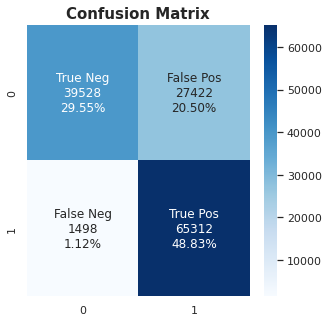

In [106]:
cm = confusion_matrix(y_test, y_pred_NB)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

###**ROC-AUC Curve**

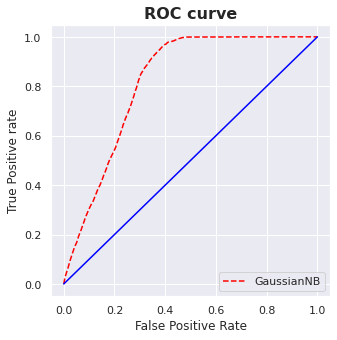

In [107]:
# predict probabilities
pred_proba = NB_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(NB_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

##**6.5. KNN Classifier**

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [109]:
# Predicting the Test set results  
y_pred = knn.predict(x_test)  

In [110]:
acc_KNN = accuracy_score(y_test,y_pred)
prec_KNN = precision_score(y_test, y_pred)
rec_KNN = recall_score(y_test, y_pred)
f1_KNN = f1_score(y_test, y_pred)
AUC_KNN=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76     66950
           1       0.74      0.85      0.79     66810

    accuracy                           0.78    133760
   macro avg       0.78      0.78      0.78    133760
weighted avg       0.78      0.78      0.78    133760



In [111]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_KNN)

Accuracy :  0.7770708732057416
ROC_AUC Score: 0.7838537583908217


###**Hyperparameter Tuning**

In [112]:
grid_params = { 'n_neighbors' : range(1, 51),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               }

In [113]:
gs = HalvingRandomSearchCV(knn, param_distributions=grid_params, scoring='accuracy', return_train_score=True, verbose=1, cv=5)

In [114]:
# fit the model on our train set
%%time
gs.fit(x_train, y_train)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 10
min_resources_: 20
max_resources_: 535038
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 300
n_resources: 20
Fitting 5 folds for each of 300 candidates, totalling 1500 fits
----------
iter: 1
n_candidates: 100
n_resources: 60
Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------
iter: 2
n_candidates: 34
n_resources: 180
Fitting 5 folds for each of 34 candidates, totalling 170 fits
----------
iter: 3
n_candidates: 12
n_resources: 540
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 4
n_candidates: 4
n_resources: 1620
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 5
n_candidates: 2
n_resources: 4860
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 22.6 s, sys: 249 ms, total: 22.8 s
Wall time: 22.7 s


HalvingRandomSearchCV(estimator=KNeighborsClassifier(),
                      param_distributions={'metric': ['minkowski', 'euclidean',
                                                      'manhattan'],
                                           'n_neighbors': range(1, 51),
                                           'weights': ['uniform', 'distance']},
                      scoring='accuracy', verbose=1)

In [115]:
# find the best score
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [116]:
knn_best=gs.best_estimator_

In [117]:
knn_best.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=50)

In [118]:
y_pred_knn = knn_best.predict(x_test)

In [119]:
acc_KNN = accuracy_score(y_test,y_pred_knn)
prec_KNN = precision_score(y_test, y_pred_knn)
rec_KNN = recall_score(y_test, y_pred_knn)
f1_KNN = f1_score(y_test, y_pred_knn)
AUC_KNN=roc_auc_score(y_pred_knn,y_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76     66950
           1       0.73      0.94      0.82     66810

    accuracy                           0.79    133760
   macro avg       0.82      0.79      0.79    133760
weighted avg       0.82      0.79      0.79    133760



In [120]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_knn))
print("ROC_AUC Score:",AUC_KNN)

Accuracy :  0.793107057416268
ROC_AUC Score: 0.8220077074605291


###**Confusion Matrix**

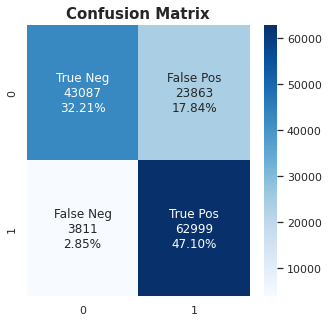

In [121]:
cm = confusion_matrix(y_test, y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

###**ROC-AUC Curve**

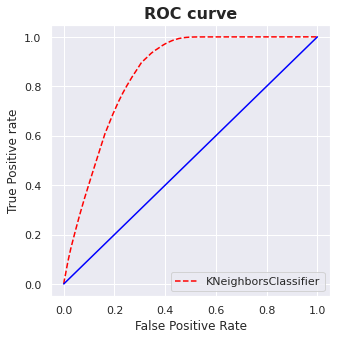

In [122]:
# predict probabilities
pred_proba = knn_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(knn_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

##**6.6. Light GBM Classifier**

In [123]:
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier()

In [124]:
# Predicting the Test set results  
y_pred = lgbm.predict(x_test)

In [125]:
acc_LGBM = accuracy_score(y_test,y_pred)
prec_LGBM = precision_score(y_test, y_pred)
rec_LGBM = recall_score(y_test, y_pred)
f1_LGBM = f1_score(y_test, y_pred)
AUC_LGBM=roc_auc_score(y_pred,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77     66950
           1       0.74      0.93      0.82     66810

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.80    133760
weighted avg       0.82      0.80      0.80    133760



In [126]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_LGBM)

Accuracy :  0.7994542464114832
ROC_AUC Score: 0.8207514045257728


###**Hyperparameter Tuning**

In [127]:
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [128]:
gs = RandomizedSearchCV(lgbm, param_distributions=param_test, scoring='roc_auc', cv=3, refit=True, verbose=True)

In [129]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c7e5dbe10>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c7e707850>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9c7e76fa10>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                              

In [130]:
lgbm_best=gs.best_estimator_

In [131]:
lgbm_best.fit(x_train,y_train)

LGBMClassifier(colsample_bytree=0.4711098576219233, min_child_samples=180,
               min_child_weight=0.01, num_leaves=35, reg_alpha=1, reg_lambda=5,
               subsample=0.8139547754282237)

In [132]:
y_pred_lgbm = lgbm_best.predict(x_test)

In [133]:
acc_LGBM = accuracy_score(y_test,y_pred_lgbm)
prec_LGBM = precision_score(y_test, y_pred_lgbm)
rec_LGBM = recall_score(y_test, y_pred_lgbm)
f1_LGBM = f1_score(y_test, y_pred_lgbm)
AUC_LGBM=roc_auc_score(y_pred_lgbm,y_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.91      0.66      0.77     66950
           1       0.73      0.93      0.82     66810

    accuracy                           0.80    133760
   macro avg       0.82      0.80      0.79    133760
weighted avg       0.82      0.80      0.79    133760



In [134]:
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,y_pred_lgbm))
print("ROC_AUC Score:",AUC_LGBM)

Accuracy :  0.797525418660287
ROC_AUC Score: 0.8212342579219516


###**Confusion Matrix**

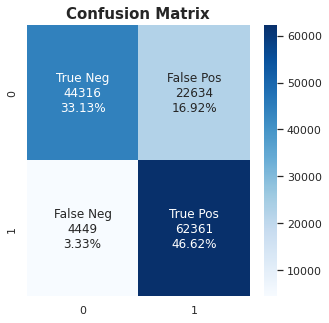

In [135]:
cm = confusion_matrix(y_test, y_pred_lgbm)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, annot=labels, fmt='',cmap='Blues')
plt.title('Confusion Matrix',fontdict={'fontsize': 15,  'fontweight' :'bold'})
plt.show()

###**ROC-AUC Curve**

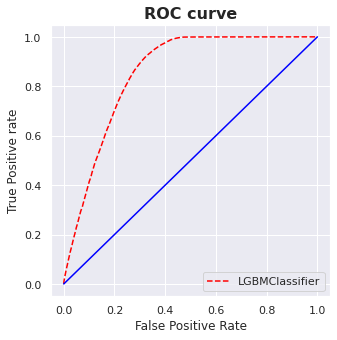

In [136]:
# predict probabilities
pred_proba = lgbm_best.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr,linestyle='--',color='red', label = type(lgbm_best).__name__)
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')

# title
plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
plt.ylabel('True Positive rate', fontdict={'fontsize': 12})
plt.legend(loc='best')
plt.show()

#**7. Comparision Metrices**

In [137]:
ind=['Decision Tree','Random Forest','XGBoost','Naive Bayes','KNN','LightGBM']
data={"Accuracy":[acc_DT,acc_RF,acc_XGB,acc_NB,acc_KNN, acc_LGBM],"Recall":[rec_DT,rec_RF,rec_XGB,rec_NB,rec_KNN,rec_LGBM],"Precision":[prec_DT,prec_RF,prec_XGB,prec_NB,prec_KNN,prec_LGBM],
    'f1_score':[f1_DT,f1_RF,f1_XGB,f1_NB,f1_KNN,f1_LGBM],"ROC_AUC":[AUC_DT,AUC_RF,AUC_XGB,AUC_NB,AUC_KNN,AUC_LGBM]}
result=pd.DataFrame(data=data,index=ind).sort_values(by='Accuracy',ascending=False)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
LightGBM,0.797525,0.933408,0.733702,0.821593,0.821234
Random Forest,0.793279,0.949783,0.723126,0.821100,0.825103
KNN,0.793107,0.942958,0.725277,0.819915,0.822008
XGBoost,0.788973,0.939216,0.721958,0.816380,0.817634
Naive Bayes,0.783792,0.977578,0.704294,0.818733,0.833890
Decision Tree,0.783478,0.978401,0.703734,0.818643,0.834215


### **We can see that LightGBM is having the maximum Accuracy and Recall among all models, hence it is the best model.**